<a href="https://colab.research.google.com/github/Emelyanova-S/pop/blob/master/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%80%D1%8F%D0%B4%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков
import matplotlib.ticker as ticker # для управления делениями осей

In [0]:
#Чтение данных
url = "https://drive.google.com/uc?export=download&id=18VeFLUIj22hRmc_tNGjfoawyn7iyqQ_w"

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
input_df = pd.read_csv(url, sep = ',', index_col = 1) 
# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()


,id,coal,nuclear,ccgt,wind,pumped,hydro,biomass,oil,solar
timestamp,,,,,,,,,,
2019-12-22 15:30:38,899501,876,6502,15956,4121,0,721,2339,0,533.0
2019-12-22 15:35:41,899502,875,6509,16120,4099,0,720,2340,0,180.0
2019-12-22 15:40:38,899503,875,6517,16160,4034,201,719,2348,0,189.0
2019-12-22 15:45:41,899504,875,6516,16124,4005,149,719,2354,0,189.0
2019-12-22 15:50:35,899505,875,6499,16094,3992,361,720,2356,0,189.0


In [0]:
input_df.tail()

,id,coal,nuclear,ccgt,wind,pumped,hydro,biomass,oil,solar
timestamp,,,,,,,,,,
2020-02-22 08:05:35,917268,538,5306,4641,12269,265,835,1011,0,51.000000
2020-02-22 08:10:34,917269,537,5311,4346,12287,0,835,1009,0,52.400002
2020-02-22 08:15:35,917270,537,5317,4305,12304,0,835,1012,0,52.400002
2020-02-22 08:20:37,917271,538,5316,4636,12218,0,836,1011,0,52.400002
2020-02-22 08:25:35,917272,539,5306,5139,12126,0,838,1011,0,58.400002


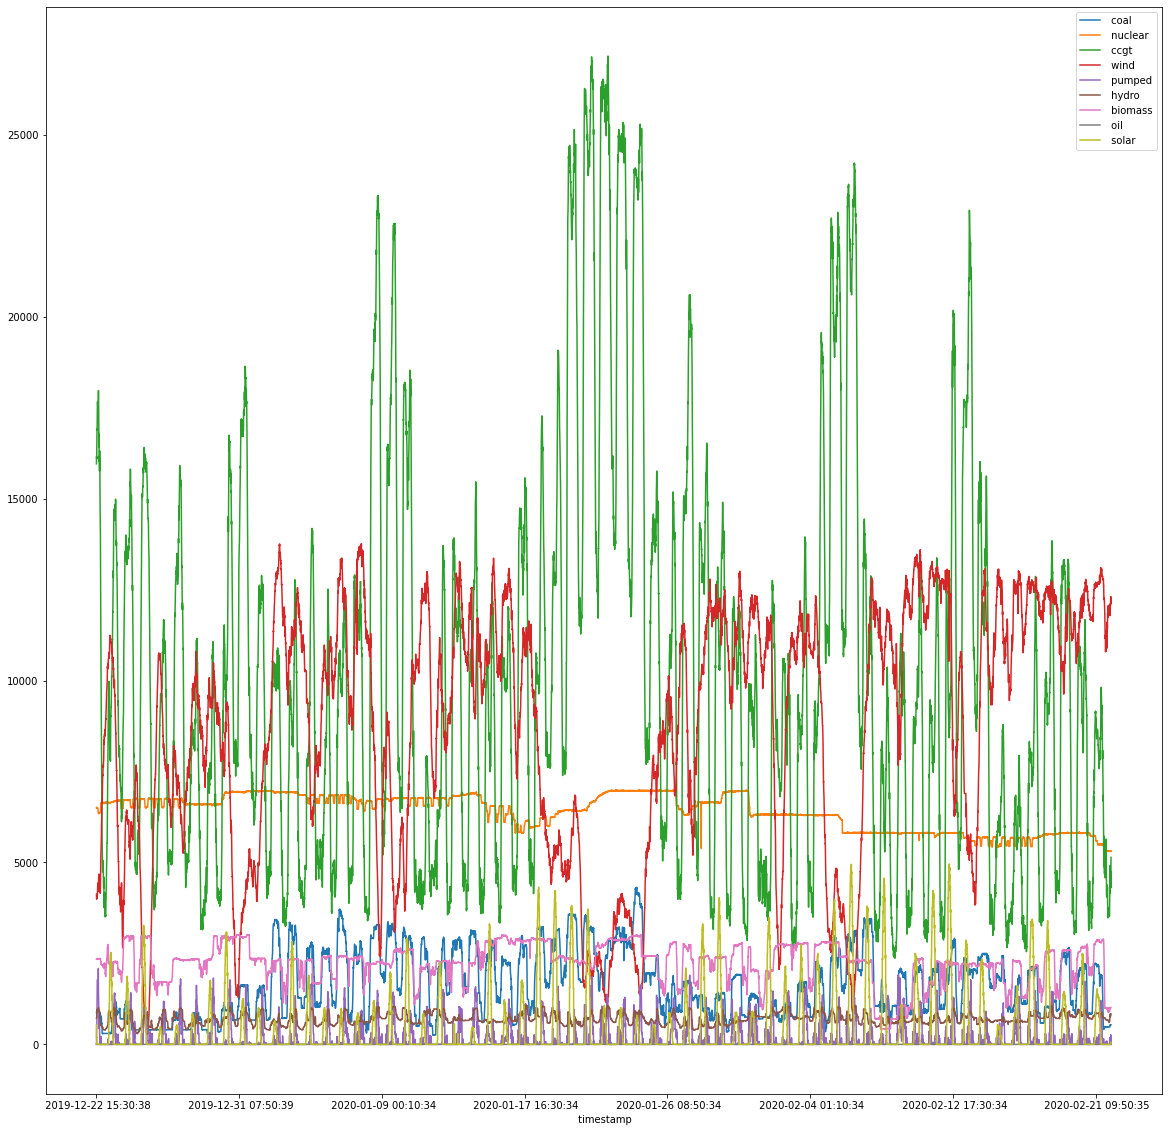

In [0]:
axes = input_df[input_df.columns[ 1 : ]].plot(marker=None, figsize=(20, 20), subplots = False)

In [0]:
fh = input_df.iloc[:48, : ]
fh_matrix = fh.values

In [0]:
gen_sum = []
for i in range(0, len(fh)):
 gen_sum.append((fh_matrix[i , 1: ]).sum(axis = 0))
gen_sum = np.array(gen_sum)

In [0]:
gen_coal = input_df.iloc[:48, 1].values
coal_percent = gen_coal / gen_sum * 100

In [0]:

# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() # создаем копию исходной таблицы
df2.reset_index(level=0, inplace=True) # сбрасываем индекс и тем самым переводим временные отметки в отдельный столбец, чтобы было удобнее работать с ними
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) # берем только первые 48 строк (>47, потому что индексация идет с нуля), т.к. нам нужны только первые 12 часов
df2['coal_percent'] = coal_percent # добавляем в новую таблицу ранее созданный массив с процентной долью выработки от угля


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) # конвертируем временные отметки в формат datetime, чтобы график воспринимал их именно как временной ряд
source = ColumnDataSource(df2) # задаем источник данных для построения осей

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") # тип оси х - datetime, опять же, чтобы программа поняла, что нам нужно записать эти данные как временной ряд
p.line(' timestamp', 'coal_percent', color='red', source=source) # первые два аргумента - это x и y соответственно, указываем названия колонок, откуда берутся данные для соотв. осей



GlyphRenderer(id='1227', ...)

In [0]:
gen_coal = input_df.iloc[:48, 2].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 



GlyphRenderer(id='1435', ...)

In [0]:
gen_coal = input_df.iloc[:48, 3].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='1664', ...)

In [0]:
gen_coal = input_df.iloc[:48, 4].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='1914', ...)

In [0]:
gen_coal = input_df.iloc[:48, 5].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]])
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime")
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='2185', ...)

In [0]:
gen_coal = input_df.iloc[:48, 6].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy()
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='2477', ...)

In [0]:
gen_coal = input_df.iloc[:48, 7].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='2790', ...)

In [0]:
gen_coal = input_df.iloc[:48, 8].values
coal_percent = gen_coal / gen_sum * 100

In [0]:
# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='3124', ...)

In [0]:
gen_coal = input_df.iloc[:48, 9].values
coal_percent = gen_coal / gen_sum * 100

In [0]:

# импорт элементов bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter
from bokeh.io import output_notebook

output_notebook()

df2 = input_df.copy() 
df2.reset_index(level=0, inplace=True) 
df2 = df2.drop(df2.index[np.where(df2.index > 47)[0]]) 
df2['coal_percent'] = coal_percent 


df2[' timestamp'] = pd.to_datetime(df2[' timestamp']) 
source = ColumnDataSource(df2) 

show(p)
p = figure(plot_width=1000, plot_height=600, x_axis_type="datetime") 
p.line(' timestamp', 'coal_percent', color='red', source=source) 

GlyphRenderer(id='3479', ...)